In [2]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [2]:
# cap = cv2.VideoCapture(1)
# with mp_holistics.Holistic(
#     min_detection_confidence=0.8,
#     min_tracking_confidence=0.8
# ) as holistic:
#     while cap.isOpened():
#         success,image=cap.read()
#         cv2.imshow('Webcam', image)
#         if not success:
#             print('Ignoring empty frames')
#             continue
#         image.flags.writeable = False
#         # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#         print(result)
#         break
# cap.release()


In [3]:
# For webcam input:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


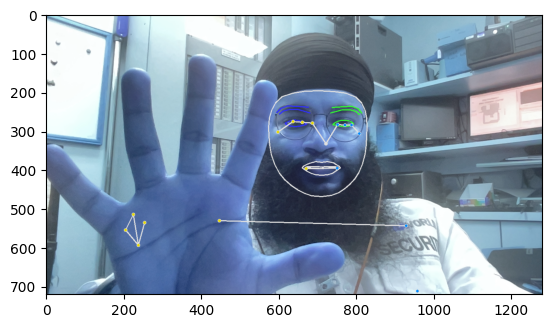

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image)


In [6]:
results.face_landmarks


landmark {
  x: 0.5560029
  y: 0.5294119
  z: -0.029055884
}
landmark {
  x: 0.55624545
  y: 0.47701135
  z: -0.050085902
}
landmark {
  x: 0.5556153
  y: 0.49331537
  z: -0.027286043
}
landmark {
  x: 0.54695714
  y: 0.42829406
  z: -0.0362201
}
landmark {
  x: 0.5561635
  y: 0.46160832
  z: -0.05282667
}
landmark {
  x: 0.55566883
  y: 0.4418554
  z: -0.048412252
}
landmark {
  x: 0.5542035
  y: 0.39529687
  z: -0.021174496
}
landmark {
  x: 0.48523468
  y: 0.39475557
  z: 0.012835289
}
landmark {
  x: 0.55351645
  y: 0.35694873
  z: -0.013483029
}
landmark {
  x: 0.553327
  y: 0.3367113
  z: -0.014692699
}
landmark {
  x: 0.55208874
  y: 0.27491188
  z: -0.0017148878
}
landmark {
  x: 0.55603945
  y: 0.53705347
  z: -0.027947899
}
landmark {
  x: 0.55597323
  y: 0.5431714
  z: -0.024937395
}
landmark {
  x: 0.5558361
  y: 0.5458919
  z: -0.020904642
}
landmark {
  x: 0.5557649
  y: 0.5516815
  z: -0.01985856
}
landmark {
  x: 0.55592185
  y: 0.5585072
  z: -0.021552406
}
landmark {


In [8]:
## new dataset


# landmarks = pd.DataFrame()
# if results.face_landmarks:
#         for i, point in enumerate(results.face_landmarks.landmark):         
#                 landmarks.loc[0, [f"x_face_{i}",f"y_face_{i}",f"z_face_{i}"]] = [point.x, point.y, point.z]
# if results.pose_landmarks:
#         for i, point in enumerate(results.pose_landmarks.landmark):
#                 landmarks.loc[0, [f"x_pose_{i}",f"y_pose_{i}",f"z_pose_{i}"]]= [point.x, point.y, point.z]
# if results.left_hand_landmarks:
#         for i, point in enumerate(results.left_hand_landmarks.landmark):        
#                 landmarks.loc[0, [f"x_left_hand_{i}",f"y_left_hand_{i}",f"z_left_hand_{i}"]] = [point.x, point.y, point.z]
# if results.right_hand_landmarks:
#         for i, point in enumerate(results.right_hand_landmarks.landmark):
#                 landmarks.loc[0, [f"z_right_hand_{i}",f"z_right_hand_{i}",f"z_right_hand_{i}"]] = [point.x, point.y, point.z] 

#         # landmarks.loc[0, f"y_face_{i}"] = point.y 
#         # landmarks.loc[0, f"z_face_{i}"] = point.z

    


<Axes: xlabel='x', ylabel='y'>

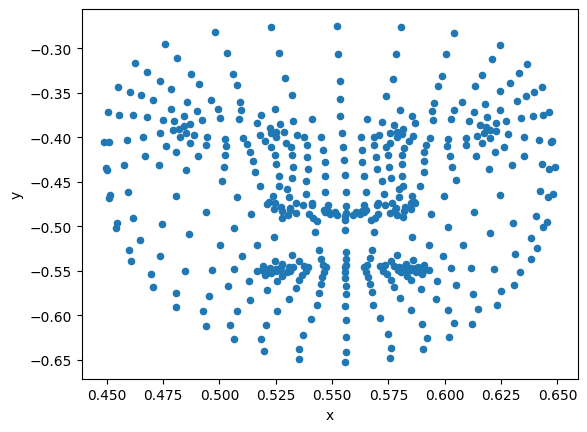

In [9]:
face['y'] = -face['y']
face.plot(x='x', y='y', kind='scatter')

In [10]:
# landmarks = pd.DataFrame()
face.shape

(468, 3)

In [40]:
def create_frame_landmark_df(results, frame):
    xyz_skel = xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()

    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()
    if results.face_landmarks:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    if results.pose_landmarks:
        for i , point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]
    if results.left_hand_landmarks:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    if results.right_hand_landmarks:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]   
    face = face.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='face')
    pose = pose.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='pose')
    left_hand = left_hand.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='left_hand')
    right_hand = right_hand.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='right_hand')


    landmarks = pd.concat([face,pose,right_hand,left_hand]).reset_index(drop=True)
    landmarks = xyz_skel.merge(landmarks, on=['type','landmark_index'], how='left')
    landmarks = landmarks.assign(frame=frame)
    return landmarks



In [42]:
create_frame_landmark_df(results, 1)

,type,landmark_index,x,y,z,frame
0,face,0,0.556003,0.529412,-0.029056,1
1,face,1,0.556245,0.477011,-0.050086,1
2,face,2,0.555615,0.493315,-0.027286,1
3,face,3,0.546957,0.428294,-0.036220,1
4,face,4,0.556163,0.461608,-0.052827,1
...,...,...,...,...,...,...
538,right_hand,16,NaN,NaN,NaN,1
539,right_hand,17,NaN,NaN,NaN,1
540,right_hand,18,NaN,NaN,NaN,1
541,right_hand,19,NaN,NaN,NaN,1


In [26]:
landmarks

,landmark_index,x,y,z,type
0,0,0.556003,0.529412,-0.029056,face
1,1,0.556245,0.477011,-0.050086,face
2,2,0.555615,0.493315,-0.027286,face
3,3,0.546957,0.428294,-0.036220,face
4,4,0.556163,0.461608,-0.052827,face
...,...,...,...,...,...
496,28,0.478270,2.756388,0.119189,pose
497,29,0.702485,2.907779,0.001484,pose
498,30,0.493513,2.861520,0.136702,pose
499,31,0.620901,2.944200,-0.397613,pose


In [35]:
xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()

,type,landmark_index
0,face,0
1,face,1
2,face,2
3,face,3
4,face,4
...,...,...
538,right_hand,16
539,right_hand,17
540,right_hand,18
541,right_hand,19


## Kaggle competion data

In [12]:
## kaggle data
train = pd.read_csv('train.csv.zip')
pq_file = "train_landmark_files/16069/100015657.parquet"
xyz = pd.read_parquet(pq_file)

In [13]:
train.query("sequence_id==100015657")

,path,participant_id,sequence_id,sign
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud


In [14]:
xyz.query('frame==103')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [15]:
xyz_np = load_relevant_data_subset(pq_file)

In [16]:
xyz_np.shape

(105, 543, 3)